In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 전체대학 중 부실대학의 비율 표시

In [3]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [23]:
rate_df = pd.read_csv('./data/under_rate.csv', index_col=0)
print(rate_df)
print(rate_df.values)
print(type(rate_df.values))

f_man_list = []
not_f_man_list = []

for i in range(3):
    f_man_list.append(rate_df.values[i][0])
    not_f_man_list.append(rate_df.values[i][1])

print(f_man_list)
print(not_f_man_list)

      신입생 기준 미달대학  재학생 기준 미달대학
2019     0.171429     0.143969
2020     0.184426     0.122530
2021     0.391837     0.151093
[[0.17142857 0.14396887]
 [0.18442623 0.12252964]
 [0.39183673 0.15109344]]
<class 'numpy.ndarray'>
[0.1714285714285714, 0.1844262295081967, 0.3918367346938775]
[0.1439688715953307, 0.1225296442687747, 0.151093439363817]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<BarContainer object of 3 artists>

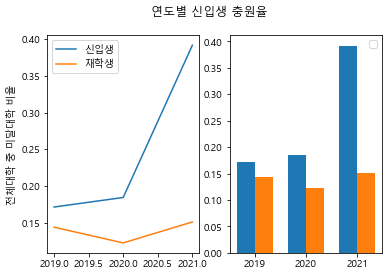

In [32]:

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('연도별 신입생 충원율')

width = 0.35

ax1.plot(rate_df.index, rate_df.values, label=['신입생', '재학생'])
ax1.set_ylabel('전체대학 중 미달대학 비율')

ax1.legend()

ax2.bar(rate_df.index - width/2, f_man_list, width, label='신입생')
ax2.bar(rate_df.index + width/2, not_f_man_list, width, label='재학생')

# ax2.bar_label(rects1, padding=3)
# ax2.bar_label(rects2, padding=3)

In [ ]:


# ax1.ylabel('전체대학 중 미달대학 비율')
# ax1.legend(loc='best')

####  두 그래프 합치기

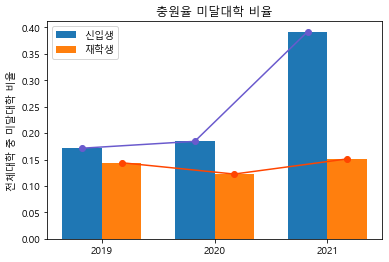

In [47]:
plt.ylabel('전체대학 중 미달대학 비율')
plt.xticks(ticks = [2019, 2020, 2021])
plt.title('충원율 미달대학 비율')
plt.bar(rate_df.index - width/2, f_man_list, width, label='신입생')
plt.bar(rate_df.index + width/2, not_f_man_list, width, label='재학생')
plt.legend()
plt.plot(rate_df.index - width/2, f_man_list, color = 'slateblue', marker='o')
plt.plot(rate_df.index + width/2, not_f_man_list, color = 'orangered', marker='o')

### 미달대학교(전체) 충원율 평균(신입생)

In [21]:
datas = ['uni_freshman_2019', 'uni_freshman_2020', 'uni_freshman_2021']
recruit_rate_mean = []

for data in datas:
    freshman_df = pd.read_csv(f'./data/under_{data}.csv', index_col=0)
    recruit_df = freshman_df['정원내 신입생 충원율(정원내 입학자/정원내 모집인원)']
    recruit_rate_mean.append(recruit_df.mean())
print(recruit_rate_mean)

[67.66190476190476, 69.21111111111111, 74.10520833333334]


이거 구해봤는데 오히려 충원율 자체는 높아지더라고요...? 그래서 사용하기는 조금 어려울 것 같습니다. 여기서 멈춰놓을께요

만약 그래도 쓴다고 하면 금방 구할 수 있습니다!

### 미달대학교(리스트 중에서) 충원율 평균(신입생)

In [70]:
datas = ['uni_freshman_2019', 'uni_freshman_2020', 'uni_freshman_2021']
recruit_rate_mean = []
raw_univ = '서울기독대학교 예원예술대학교 경주대학교 금강대학교 대구예술대학교 신경대학교  제주국제대학교  한국국제대학교  한려대학교  두원공대학교  부산과학기술대학교  서라벌대학교  강원관광대학교  고구려대학교  광양보건대학교  대덕대학교  영남외국어대학교  웅지세무대학교'
univ_list = raw_univ.split()
print(univ_list)

['서울기독대학교', '예원예술대학교', '경주대학교', '금강대학교', '대구예술대학교', '신경대학교', '제주국제대학교', '한국국제대학교', '한려대학교', '두원공대학교', '부산과학기술대학교', '서라벌대학교', '강원관광대학교', '고구려대학교', '광양보건대학교', '대덕대학교', '영남외국어대학교', '웅지세무대학교']


In [71]:

for data in datas:
    freshman_df = pd.read_csv(f'./data/under_{data}.csv', index_col=0)
    recruit_df = freshman_df[['학교', '정원내 신입생 충원율(정원내 입학자/정원내 모집인원)']]
    # recruit_df = recruit_df.set_index('학교')
    print(recruit_df)

    print(recruit_df["학교"].isin(univ_list)) #오류----- univ_list에 있는 대학이 recruit_df의 '학교'column에 있으면 값을 반환하는 코드. 여기서 다 False가 뜸
    under_univ = recruit_df[recruit_df["학교"].isin(univ_list)]
    print(under_univ)

               학교  정원내 신입생 충원율(정원내 입학자/정원내 모집인원)
0      가야대학교(김해)                            87.9
1       감리교신학대학교                            95.1
2       건양사이버대학교                            89.2
3          경주대학교                            20.5
4       경희사이버대학교                            71.1
5       고려사이버대학교                            71.8
6       광주가톨릭대학교                            72.5
7          김천대학교                            96.6
8      대구경북과학기술원                            89.1
9       대구사이버대학교                            66.2
10       대구예술대학교                            74.4
11      대전가톨릭대학교                            30.0
12       대전신학대학교                            28.3
13  디지털서울문화예술대학교                            77.3
14      부산디지털대학교                            76.3
15       부산장신대학교                            58.0
16   사이버한국외국어대학교                            78.7
17       서울기독대학교                            91.9
18      서울디지털대학교                            57.2
19      서울사이버대학교    

지금 리스트에서 없는 대학교들이 많아서 대학교 리스트들이 수정이 되어야 할 것 같아요ㅠㅠㅠ